# Exploring Kitti Dataset
This notebook is only to explore the Kitti dataset and get some useful information about it.

## Object Detection Evaluation 2012
http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=2d

![Object Detection Evaluation 2012 Dataset Sample](http://www.cvlibs.net/datasets/kitti/images/header_object.jpg)

The object detection and object orientation estimation benchmark consists of 7481 training images and 7518 test images, comprising a total of 80.256 labeled objects. All images are color and saved as png. For evaluation, we compute precision-recall curves for object detection and orientation-similarity-recall curves for joint object detection and orientation estimation. In the latter case not only the object 2D bounding box has to be located correctly, but also the orientation estimate in bird's eye view is evaluated. To rank the methods we compute average precision and average orientation similiarity. We require that all methods use the same parameter set for all test pairs. Our development kit provides details about the data format as well as MATLAB / C++ utility functions for reading and writing the label files.

Kitti <br/>
&nbsp;&nbsp;&nbsp;↳ data_object_image_2 <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳ testing <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳ image_2 _(7518 img)_ <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳ training <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳ image_2 _(7481 img)_ <br/>
&nbsp;&nbsp;&nbsp;↳ data_object_label_2 <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳ training <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳ label_2 _(7481 txt)_ <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳xml _(empty)_ <br/>
              <br/>
&nbsp;&nbsp;&nbsp;↳ label_test.txt _(images used for testing)_ <br/>
&nbsp;&nbsp;&nbsp;↳ label_train.txt _(images used for training)_ <br/>
&nbsp;&nbsp;&nbsp;↳ table-xml.el _()_ <br/>
&nbsp;&nbsp;&nbsp;↳ xml _(empty)_ <br/>

In [1]:
# To import the picture
from scipy import misc

import math
import numpy as np
import numbers
import time

# To display the image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

from kitti_utils import *    # fcts. to manage the kitti dataset

## Label Management
The labels corresponding to the images of the training set are all in the folder: _Kitti/data_object_label_2/training/label_2/_. They are _.txt_ files where all values (numerical or strings) are separated via spaces,
each row corresponds to one object:
- __Type of object__ (1): 'Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram', 'Misc' or 'DontCare'
- __Truncated__ (1): Float from 0 (non-truncated) to 1 (truncated), where truncated refers to the object leaving image boundaries
- __Occluded__ (1): Integer (0,1,2,3) indicating occlusion state:
  - 0 = fully visible
  - 1 = partly occluded
  - 2 = largely occluded
  - 3 = unknown
- __Observation angle__ alpha of object (1): ranging \[-pi..pi\]
- __Bbox of object in the image__ (4): x_min, y_min, x_max, y_max pixel coordinates (0-based index).
- __3D object dimensions__ (3): height, width, length (in meters)
- __3D object location__ (3): x,y,z in camera coordinates (in meters)
- __Rotation r_y__ (3): around Y-axis in camera coordinates \[-pi..pi\]
- __Score__ (1): Only for results Float, indicating confidence in detection, needed for p/r curves, higher is better.

In [2]:
# print(ABSOLUTE_PATH)
max_len_label = 0
id_max_len_label = 0
for i in range(1000):
    label = import_labels((6413 + i), 'train')
    if len(label) > max_len_label:
        max_len_label = len(label)
        id_max_len_label = 6413 + i
    
print(str(id_max_len_label) + " --> " + str(max_len_label))

6833 --> 21


In [3]:
print_labels(import_labels(4321, 'train'), ['Pedestrian'], ['bbox'])

----------------------------------------------------------------------
|type            |  y_min     |  x_max     |  y_max     |  x_min     |
----------------------------------------------------------------------
----------------------------------------------------------------------
|Pedestrian      |  163.1     |  596.1     |  222.73    |  577.1     |
----------------------------------------------------------------------
|Pedestrian      |  160.34    |  614.7     |  222.79    |  597.03    |
----------------------------------------------------------------------
|Pedestrian      |  150.9     |  548.49    |  319.45    |  470.16    |
----------------------------------------------------------------------
|Pedestrian      |  134.67    |  1232.36   |  308.9     |  1163.69   |
----------------------------------------------------------------------
|Pedestrian      |  163.41    |  534.96    |  238.34    |  502.96    |
----------------------------------------------------------------------
|Pedes

## Image Management

(375, 1242, 3)
(378, 378, 3)


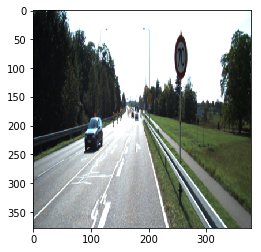

In [4]:
im = import_im(700, 'train')
print(im.shape)
im_resized = misc.imresize(im, (378,378,3))
print(im_resized.shape)
# Display image
fig, ax = plt.subplots(1)
ax.imshow(im_resized)

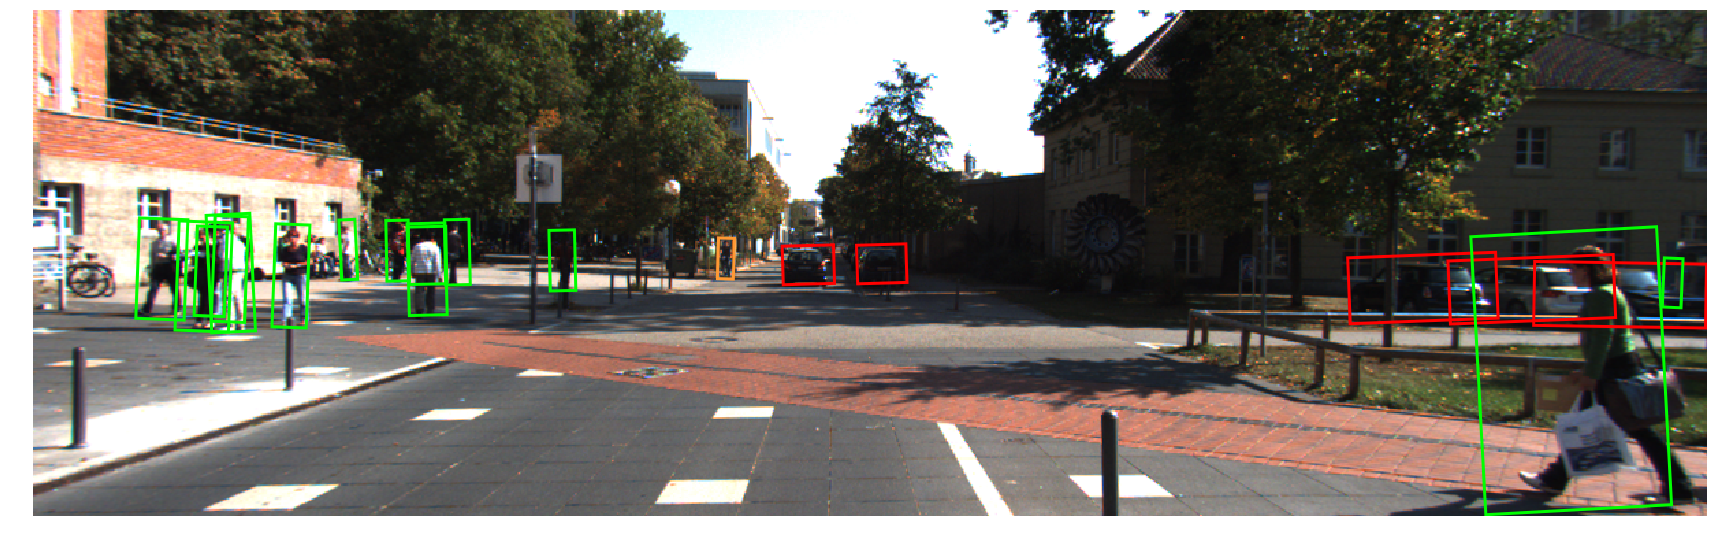

'image                 -- np array representing the image\n    labels                -- dictionary containing the labels of the image\n    display_boxes         -- True or False\n    display_info          -- True or False\n    types_to_display      -- list of the name of the types of object to consider\n    info_to_display       -- list of the name of the information to display\n    db_absolute_path      -- absolute path to the Kitti root folder\n    im_width              -- width of the image to display\n    im_height             -- height of the image to display\n    display_axis          -- True or False\n    title                 -- String to use as a title\n    display_center_boxes  -- True / False to indicate the center of the boxes\n    num_cell_grid         -- Number of cell in the grid along one axis'

In [24]:
#display_im(700, 'train')
#display_im(6422, 'train') # 20 objects
# display_im(6833, 'train') # 21 objects

data_id = 6422
im = import_im(data_id, 'train')
labels = import_labels(data_id, 'train')
#display_im(im, display_center_boxes=False, display_info=False)
#display_im(im, labels, display_center_boxes=False, display_info=False)
#display_im(im, labels, num_cell_grid = 10, display_info=False, types_to_display=['Pedestrian'])
display_im(im, labels, display_info=False, display_center_boxes=False)

'''image                 -- np array representing the image
    labels                -- dictionary containing the labels of the image
    display_boxes         -- True or False
    display_info          -- True or False
    types_to_display      -- list of the name of the types of object to consider
    info_to_display       -- list of the name of the information to display
    db_absolute_path      -- absolute path to the Kitti root folder
    im_width              -- width of the image to display
    im_height             -- height of the image to display
    display_axis          -- True or False
    title                 -- String to use as a title
    display_center_boxes  -- True / False to indicate the center of the boxes
    num_cell_grid         -- Number of cell in the grid along one axis'''


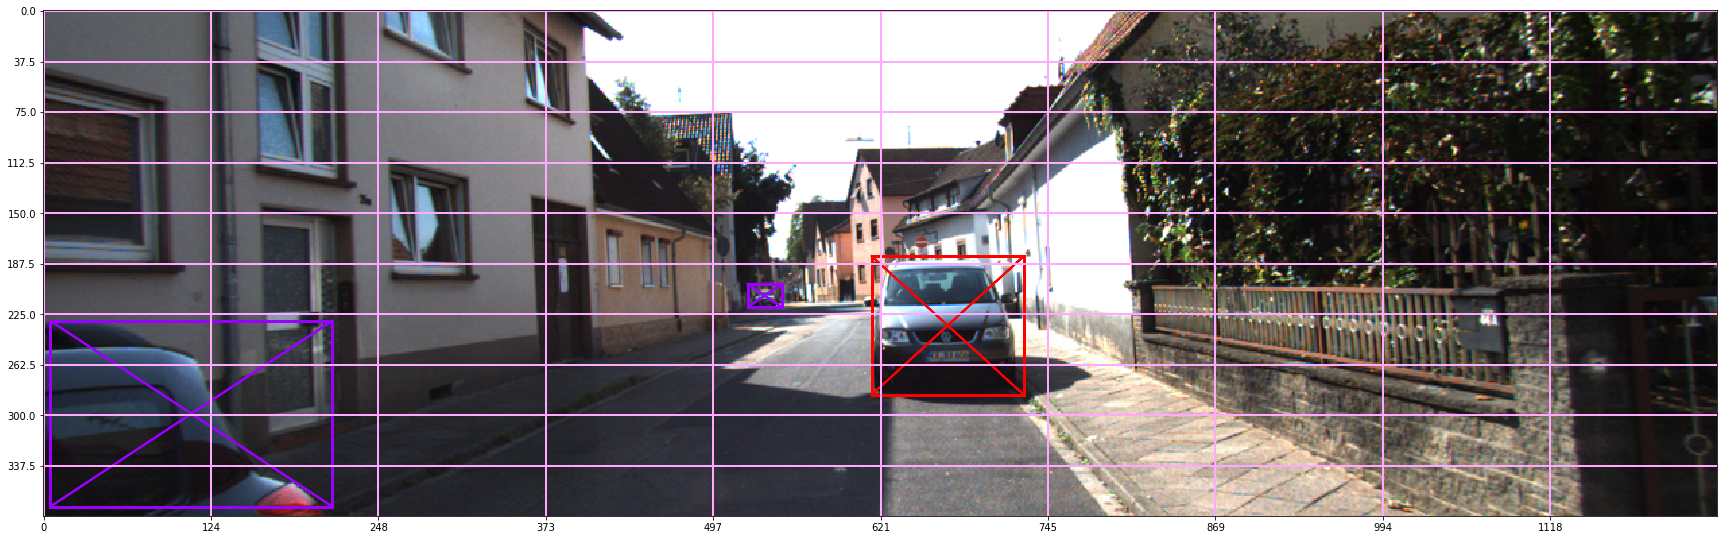

----------------------------------------------------------------------
|type            |  y_min     |  y_max     |  x_min     |  x_max     |
----------------------------------------------------------------------
----------------------------------------------------------------------
|Car             |  181.78    |  284.77    |  614.24    |  727.31    |
----------------------------------------------------------------------
|DontCare        |  229.89    |  367.61    |  5.0       |  214.12    |
----------------------------------------------------------------------
|DontCare        |  202.35    |  219.71    |  522.25    |  547.77    |
----------------------------------------------------------------------


In [3]:
list_ids = get_data_list('train')
image = import_im(list_ids[3], 'train')
labels = import_labels(list_ids[3], 'train')
display_im(image, labels, title = 'Train ' + str(list_ids[2]), num_cell_grid = 10)